### Get our Data

In [1]:
USAhousing <- read.csv("USA_Housing.csv", stringsAsFactors = TRUE)

### Check out the Data

In [2]:
head(USAhousing)

Avg..Area.Income,Avg..Area.House.Age,Avg..Area.Number.of.Rooms,Avg..Area.Number.of.Bedrooms,Area.Population,Price,Address
79545.46,5.682861,7.009188,4.09,23086.80,1059033.6,"208 Michael Ferry Apt. 674 Laurabury, NE 37010-5101"
79248.64,6.002900,6.730821,3.09,40173.07,1505890.9,"188 Johnson Views Suite 079 Lake Kathleen, CA 48958"
61287.07,5.865890,8.512727,5.13,36882.16,1058988.0,"9127 Elizabeth Stravenue Danieltown, WI 06482-3489"
63345.24,7.188236,5.586729,3.26,34310.24,1260616.8,USS Barnett FPO AP 44820
59982.20,5.040555,7.839388,4.23,26354.11,630943.5,USNS Raymond FPO AE 09386
80175.75,4.988408,6.104512,4.04,26748.43,1068138.1,"06039 Jennifer Islands Apt. 443 Tracyport, KS 16077"


In [3]:
str(USAhousing)

'data.frame':	5000 obs. of  7 variables:
 $ Avg..Area.Income            : num  79545 79249 61287 63345 59982 ...
 $ Avg..Area.House.Age         : num  5.68 6 5.87 7.19 5.04 ...
 $ Avg..Area.Number.of.Rooms   : num  7.01 6.73 8.51 5.59 7.84 ...
 $ Avg..Area.Number.of.Bedrooms: num  4.09 3.09 5.13 3.26 4.23 4.04 3.41 2.42 2.3 6.1 ...
 $ Area.Population             : num  23087 40173 36882 34310 26354 ...
 $ Price                       : num  1059034 1505891 1058988 1260617 630943 ...
 $ Address                     : Factor w/ 5000 levels "000 Adkins Crescent\nSouth Teresa, AS 49642-1348",..: 963 864 4070 4957 4899 312 2148 4345 4969 4806 ...


In [5]:
class(summary(USAhousing))

[1] "table"

In [6]:
colnames(USAhousing)

[1] "Avg..Area.Income"             "Avg..Area.House.Age"         
[3] "Avg..Area.Number.of.Rooms"    "Avg..Area.Number.of.Bedrooms"
[5] "Area.Population"              "Price"                       
[7] "Address"

### EDA
Let's create some simple plots to check out the data!

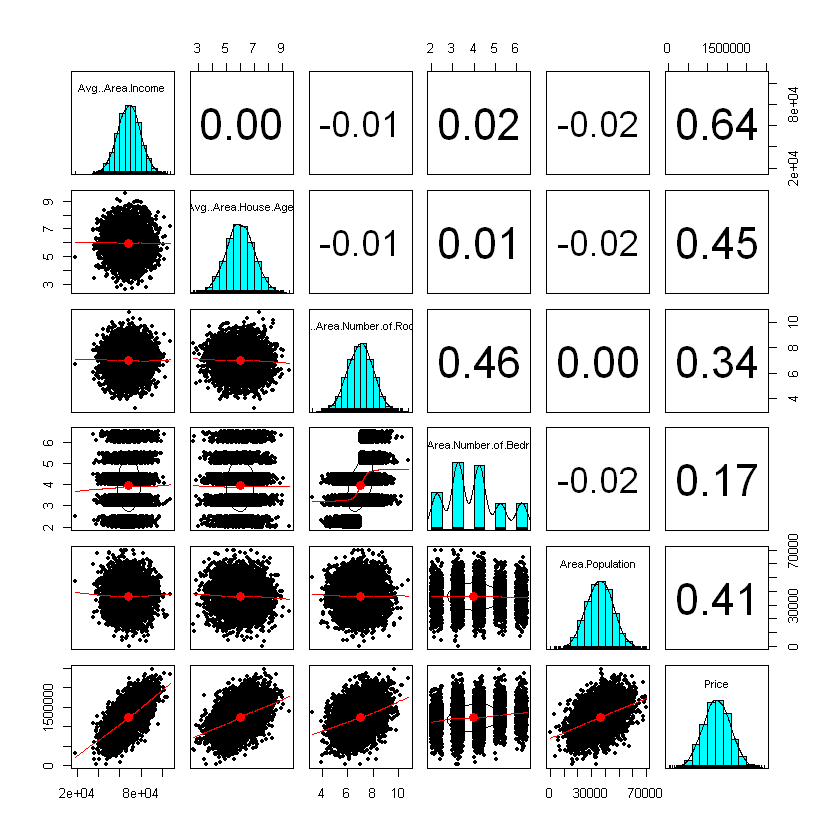

In [7]:
library(psych)
pairs.panels(USAhousing[c('Avg..Area.Income', 'Avg..Area.House.Age', 'Avg..Area.Number.of.Rooms', 'Avg..Area.Number.of.Bedrooms', 'Area.Population', 'Price' )])

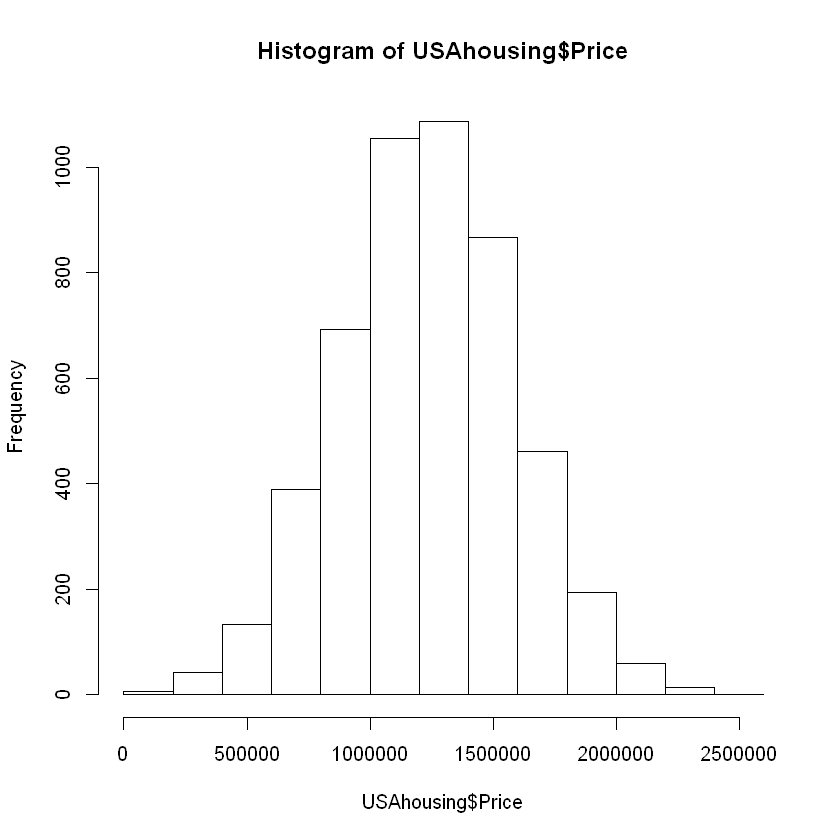

In [7]:
hist(USAhousing$Price)

In [8]:
# Grab only numeric columns
num.cols <- sapply(USAhousing, is.numeric)

# Filter to numeric columns for correlation
cor.data <- cor(USAhousing[,num.cols])

cor.data

,Avg..Area.Income,Avg..Area.House.Age,Avg..Area.Number.of.Rooms,Avg..Area.Number.of.Bedrooms,Area.Population,Price
Avg..Area.Income,1.000000000,-0.002006826,-0.011031660,0.019788221,-0.016233740,0.6397338
Avg..Area.House.Age,-0.002006826,1.000000000,-0.009428292,0.006148923,-0.018742762,0.4525425
Avg..Area.Number.of.Rooms,-0.011031660,-0.009428292,1.000000000,0.462694860,0.002039928,0.3356645
Avg..Area.Number.of.Bedrooms,0.019788221,0.006148923,0.462694860,1.000000000,-0.022167642,0.1710710
Area.Population,-0.016233740,-0.018742762,0.002039928,-0.022167642,1.000000000,0.4085559
Price,0.639733778,0.452542537,0.335664453,0.171071028,0.408555879,1.0000000


In [ ]:
#install.packages('corrgram',repos = 'http://cran.us.r-project.org')
#install.packages('corrplot',repos = 'http://cran.us.r-project.org')

In [11]:
library(corrplot)
#library(corrgram)

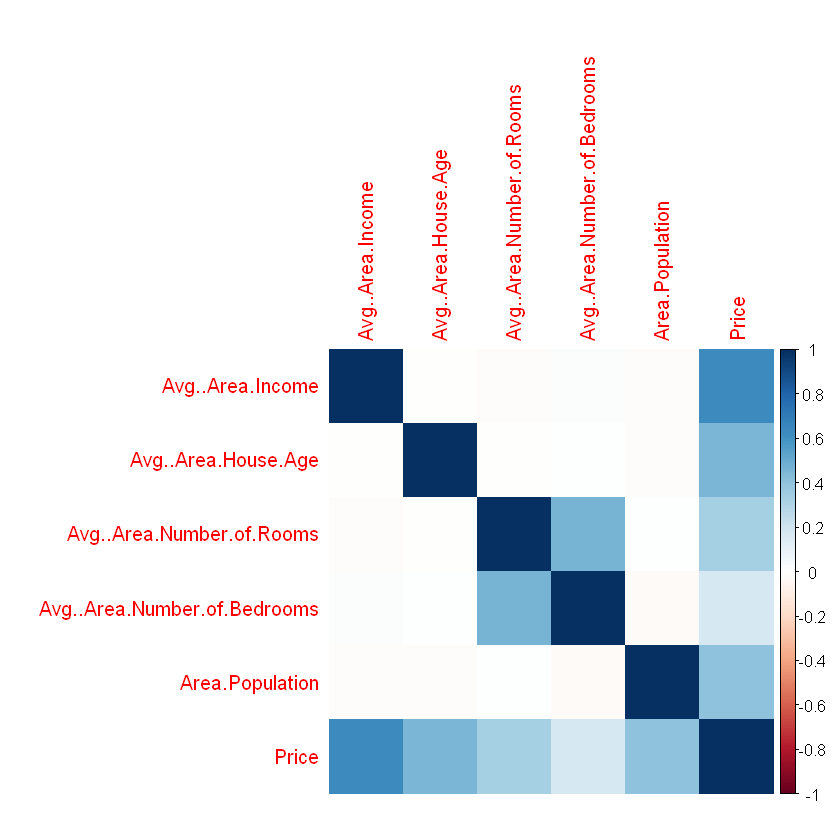

In [10]:
corrplot(cor.data,method='color')

### Training a Linear Regression Model

#### Train Test Split¶
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [13]:
# Import Library
library(caTools)
# Set a random see so your "random" results are the same as this notebook
set.seed(101) 
USAhousing <- USAhousing[num.cols]
# Split up the sample, basically randomly assigns a booleans to a new column "sample"
sample <- sample.split(USAhousing$Price, SplitRatio = 0.70) # SplitRatio = percent of sample==TRUE

# Training Data
train = subset(USAhousing, sample == TRUE)

# Testing Data
test = subset(USAhousing, sample == FALSE)

#### Creating and Training the Model

In [14]:
model <- lm(Price ~ .,train)

#### Model Evaluation

In [15]:
summary(model)


Call:
lm(formula = Price ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-336105  -69033    1422   67454  348773 

Coefficients:
                               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                  -2.640e+06  2.026e+04 -130.333   <2e-16 ***
Avg..Area.Income              2.155e+01  1.613e-01  133.599   <2e-16 ***
Avg..Area.House.Age           1.664e+05  1.714e+03   97.128   <2e-16 ***
Avg..Area.Number.of.Rooms     1.206e+05  1.919e+03   62.868   <2e-16 ***
Avg..Area.Number.of.Bedrooms  2.250e+03  1.559e+03    1.444    0.149    
Area.Population               1.511e+01  1.721e-01   87.793   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 100600 on 3494 degrees of freedom
Multiple R-squared:  0.919,	Adjusted R-squared:  0.9189 
F-statistic:  7931 on 5 and 3494 DF,  p-value: < 2.2e-16


![](diag.png)


In [16]:
# Grab residuals
res <- residuals(model)

# Convert to DataFrame for gglpot
res <- as.data.frame(res)

head(res)

,res
1,-164162.6291
2,13521.9886
4,139887.7092
5,-213557.9657
6,862.6018
7,-164160.5045


Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"
Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


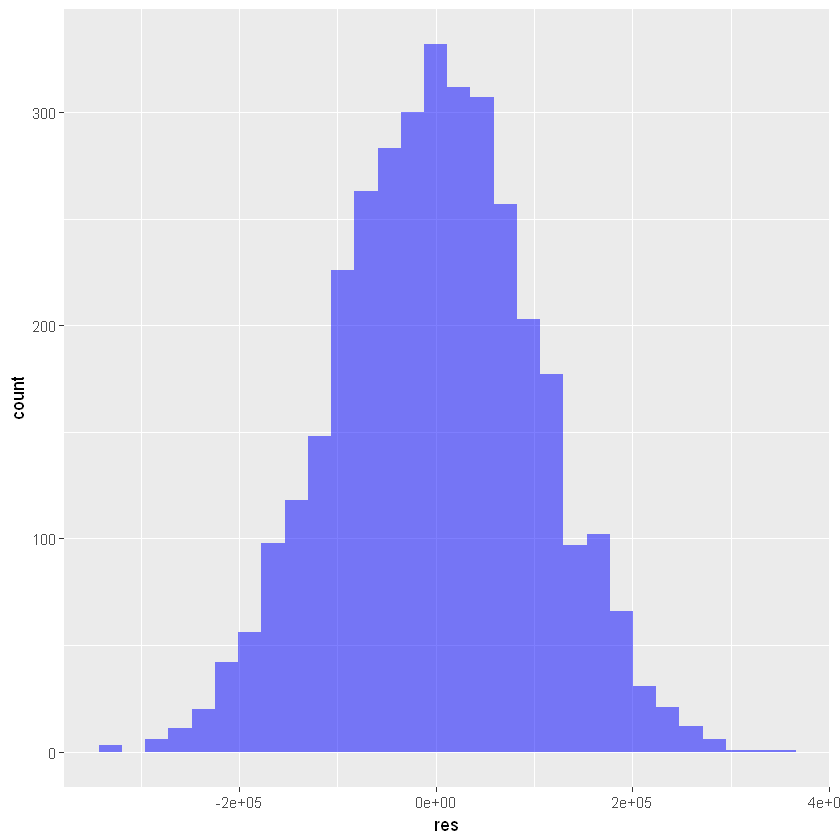

In [17]:
# Histogram of residuals
require(ggplot2)
ggplot(res,aes(res)) +  geom_histogram(fill='blue',alpha=0.5)

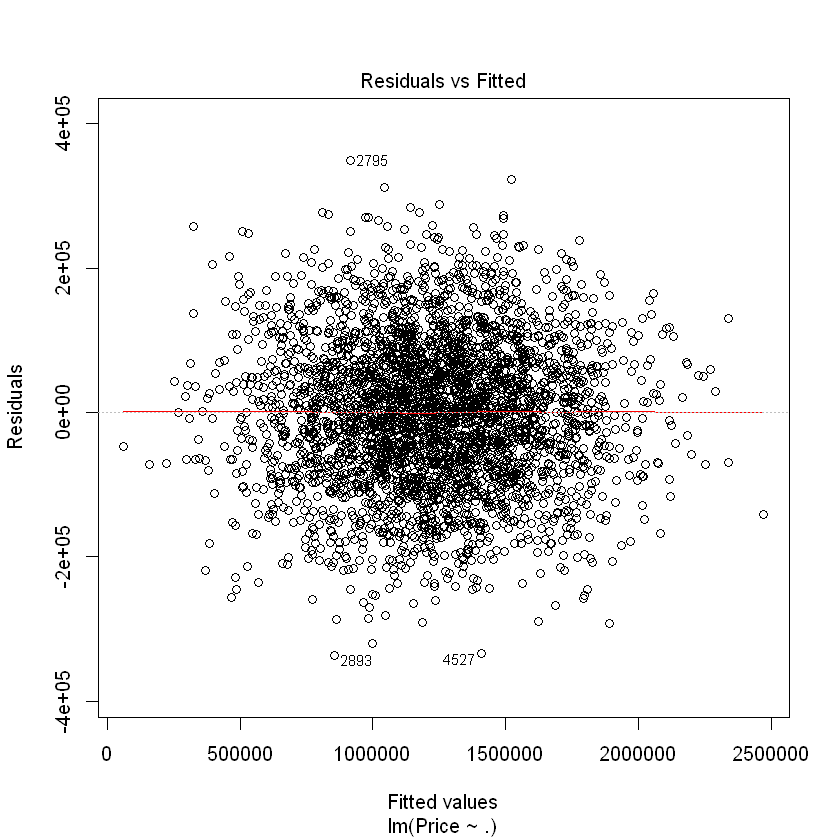

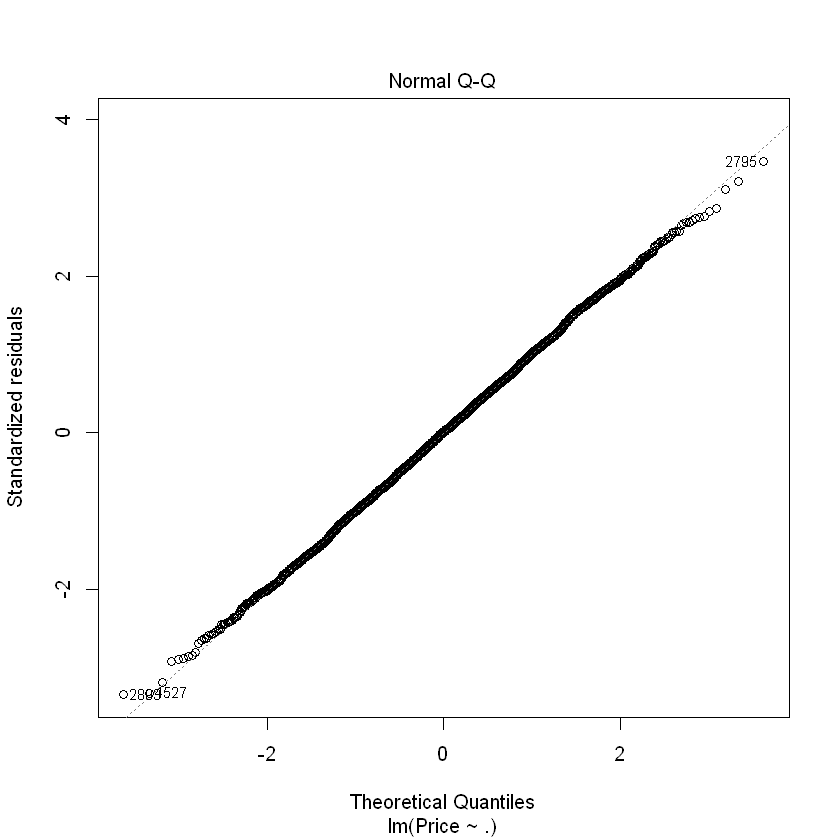

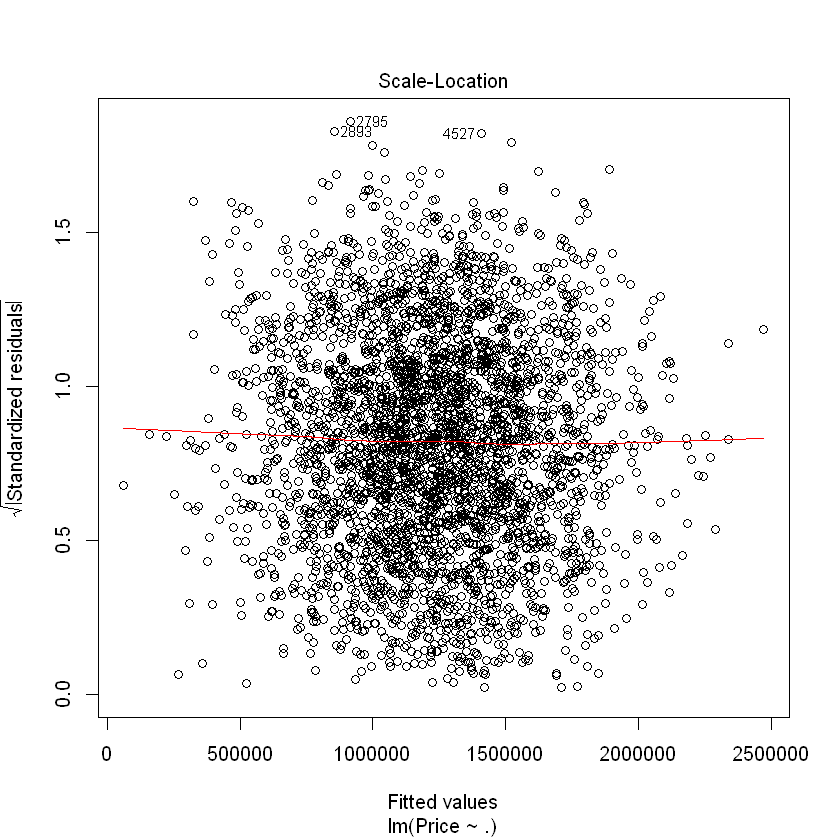

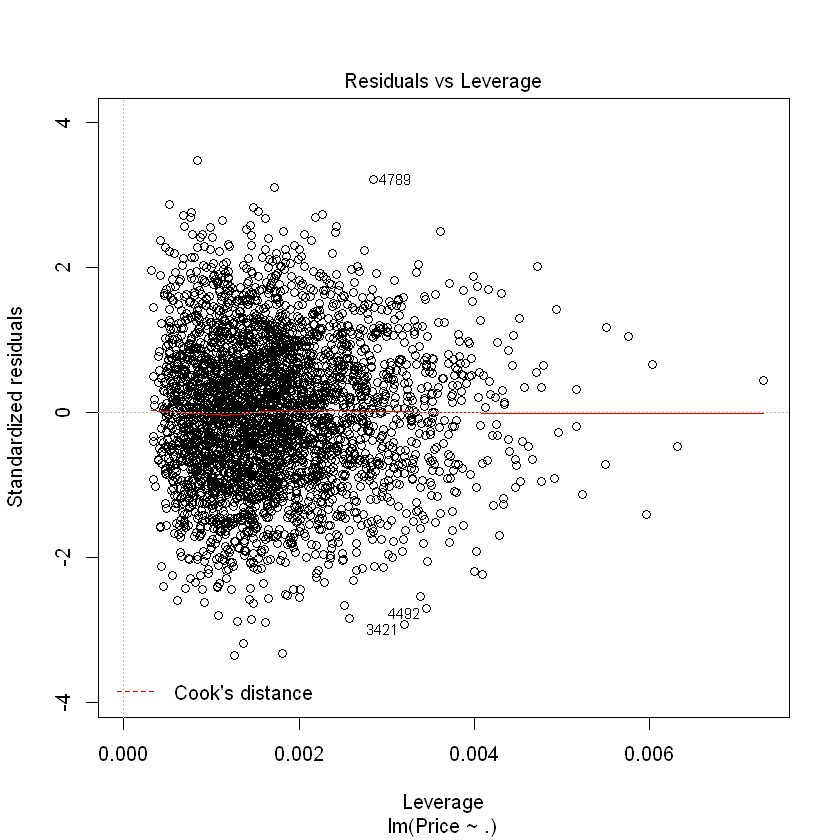

In [26]:
plot(model)

### Predictions from our Model

In [19]:
predictions <- predict(model,test)

In [20]:
results <- cbind(predictions,test$Price) 
colnames(results) <- c('pred','real')
results <- as.data.frame(results)

In [21]:
head(results)

,pred,real
3,1252289.0,1058988.0
11,1773069.2,1707045.7
12,628069.4,663732.4
13,951724.0,1042814.1
14,1304428.1,1291331.5
17,1519414.8,1556786.6


#### Regression Evaluation Metrics

In [41]:
mse <- mean((results$real-results$pred)^2)
rmse <- mse^0.5
mae <-mean(abs(results$real-results$pred))
cat('MSE:',mse)

MSE: 10514047192

In [40]:
cat('RMSE:',rmse)

RMSE: 102538

In [39]:
cat('MAE:',mae)

MAE: 83481.38